# CSVファイルからデータセット読み取り、モデルを訓練・テスト

In [1]:
## import dependencies
from sklearn import tree #For Decision Tree
import pandas as pd # For DataFrame
import pydotplus # To create Decision Tree Graph
from IPython.display import Image # To Display a image of our graph

In [2]:
### - 1 - ###
#Read the dataset
dataset = 'golf_play.csv'
golf_df=pd.read_csv(dataset, dtype='category')

#Print/show the new data
print(golf_df)

     Outlook Temperature Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no


In [3]:
### - 2 - ###
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
#print the new dummy data
print(one_hot_data)

    Outlook_overcast  Outlook_rainy  Outlook_sunny  Temperature_cool  \
0                  0              0              1                 0   
1                  0              0              1                 0   
2                  1              0              0                 0   
3                  0              1              0                 0   
4                  0              1              0                 1   
5                  0              1              0                 1   
6                  1              0              0                 1   
7                  0              0              1                 0   
8                  0              0              1                 1   
9                  0              1              0                 0   
10                 0              0              1                 0   
11                 1              0              0                 0   
12                 1              0              0              

In [4]:
### - 3 - ###
# The decision tree classifier. criterion="entropy", default criterion="gini"
clf = tree.DecisionTreeClassifier() 
# Training the Decision Tree
clf_train = clf.fit(one_hot_data, golf_df['Play'])


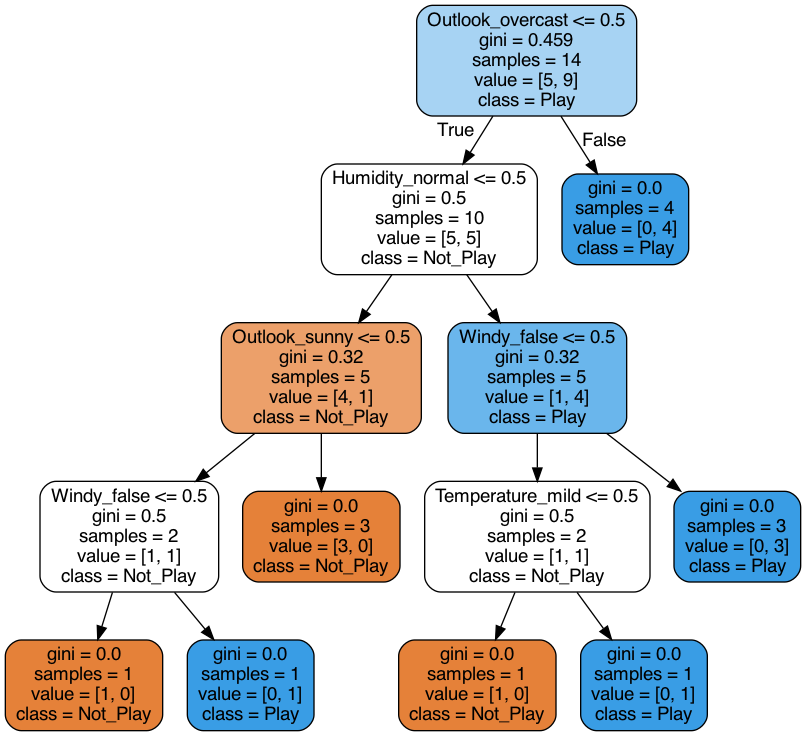

In [5]:
### -4- ###
# Export/Print a decision tree in DOT format.
# print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 

#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Windows上ではGraphvizのインスト―ル＋以下の追加部分
#graph.progs = {'dot': u"D:\\local\\Graphviz\\bin\\dot.exe"}  

# Show graph
Image(graph.create_png())

In [6]:
### - 5 - ###
# Test model prediction input:
print ("Outlook=sunny, Temperature=hot, Humidity=normal, Windy=false")
case = pd.DataFrame([[0,0,1,0,1,0,0,1,1,0]],columns=one_hot_data.columns.values)
prediction = clf_train.predict(case)
print("predictions : " + str(prediction))

Outlook=sunny, Temperature=hot, Humidity=normal, Windy=false
predictions : ['yes']
